In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score, roc_curve



from google.colab import files
uploaded = files.upload()

# Wczytanie danych
penguins = pd.read_csv('penguins.csv')

# Podstawowe informacje o danych
print(penguins.info())
print("\nLiczba brakujących wartości:")
print(penguins.isnull().sum())

# Usunięcie wierszy z brakującymi wartościami
penguins = penguins.dropna()

# Statystyki opisowe
print("\nStatystyki opisowe:")
print(penguins.describe())

# Rozkład klas
print("\nRozkład gatunków pingwinów:")
print(penguins['Species'].value_counts(normalize=True))

ModuleNotFoundError: No module named 'google.colab'

               CulmenLength  CulmenDepth  FlipperLength  BodyMass   Species
CulmenLength       1.000000    -0.235053       0.656181  0.595110  0.779857
CulmenDepth       -0.235053     1.000000      -0.583851 -0.471916 -0.183090
FlipperLength      0.656181    -0.583851       1.000000  0.871202  0.357472
BodyMass           0.595110    -0.471916       0.871202  1.000000  0.209717
Species            0.779857    -0.183090       0.357472  0.209717  1.000000


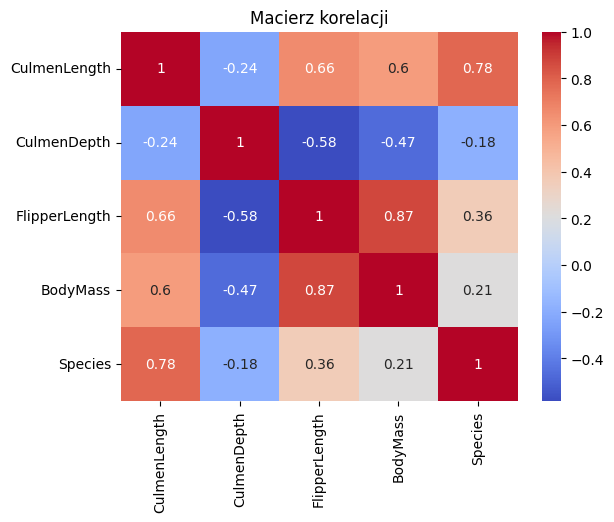

In [ ]:
# Oblicz macierz korelacji (dla kolumn numerycznych)
correlation_matrix = penguins.corr(numeric_only=True)

# Wyświetl macierz korelacji
print(correlation_matrix)

# Wizualizacja macierzy korelacji jako heatmapa
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Macierz korelacji')
plt.show()

In [ ]:
penguins['Species'].value_counts()



,count
Species,
0,151
1,123
2,68


In [ ]:
penguins

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2
340,43.5,18.1,202.0,3400.0,2
341,49.6,18.2,193.0,3775.0,2
342,50.8,19.0,210.0,4100.0,2


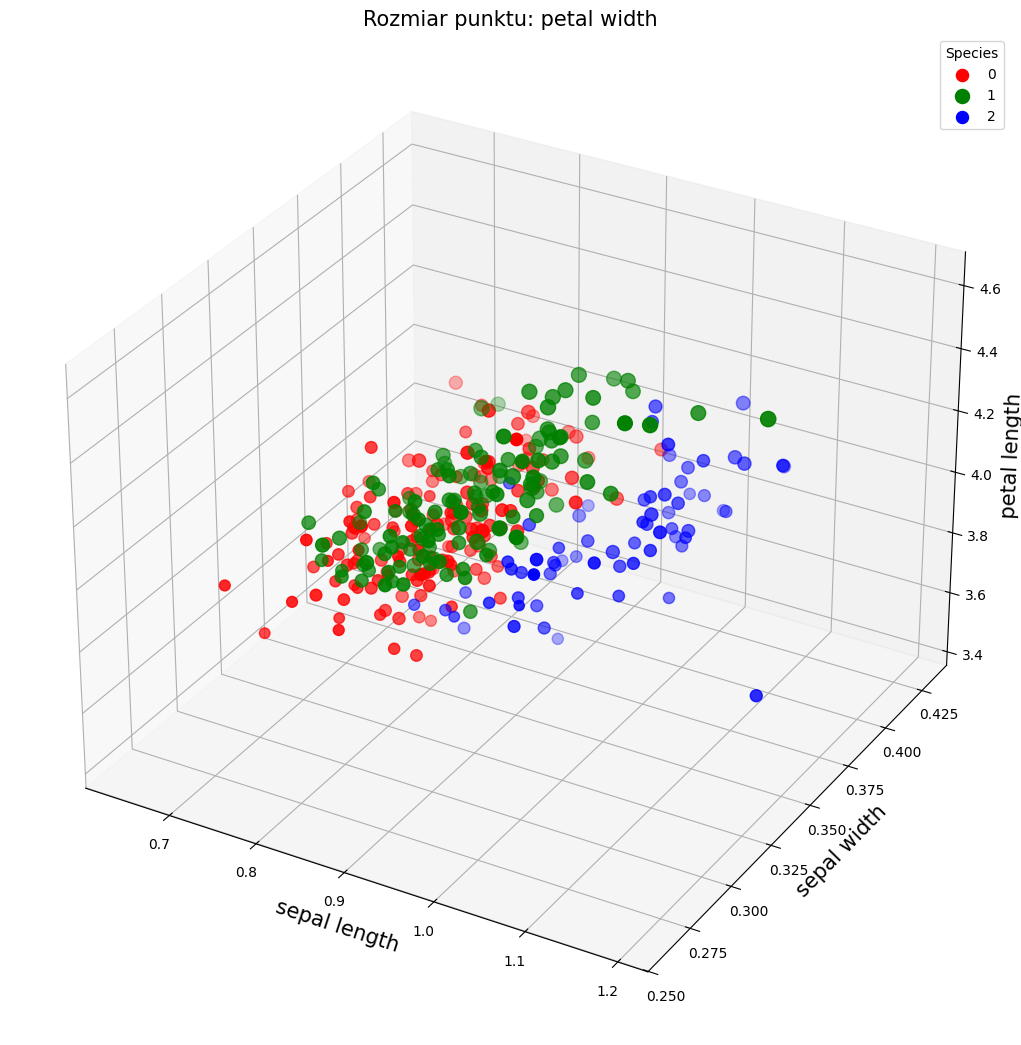

In [ ]:
fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(xs=penguins.loc[penguins['Species']==0, 'CulmenLength'] /50,
                 ys=penguins.loc[penguins['Species']==0,'CulmenDepth'] /50,
                 zs=penguins.loc[penguins['Species']==0, 'FlipperLength'] /50,
                 s=penguins.loc[penguins['Species']==0,'BodyMass']/50,
                 c='red', label='0')
img = ax.scatter(xs=penguins.loc[penguins['Species']==1, 'CulmenLength'] /50,
                 ys=penguins.loc[penguins['Species']==1,'CulmenDepth'] /50,
                 zs=penguins.loc[penguins['Species']==1, 'FlipperLength'] /50,
                 s=penguins.loc[penguins['Species']==1,'BodyMass'] /50,
                 c='green', label='1')
img = ax.scatter(xs=penguins.loc[penguins['Species']==2, 'CulmenLength'] /50,
                 ys=penguins.loc[penguins['Species']==2,'CulmenDepth'] /50,
                 zs=penguins.loc[penguins['Species']==2, 'FlipperLength'] /50,
                 s=penguins.loc[penguins['Species']==2,'BodyMass'] /50,
                 c='blue', label='2')
ax.set_xlabel(xlabel='sepal length', size=15)
ax.set_ylabel(ylabel='sepal width', size=15)
ax.set_zlabel(zlabel='petal length', size=15)
ax.set_title('Rozmiar punktu: petal width', size=15)
plt.legend(title='Species')
plt.show()

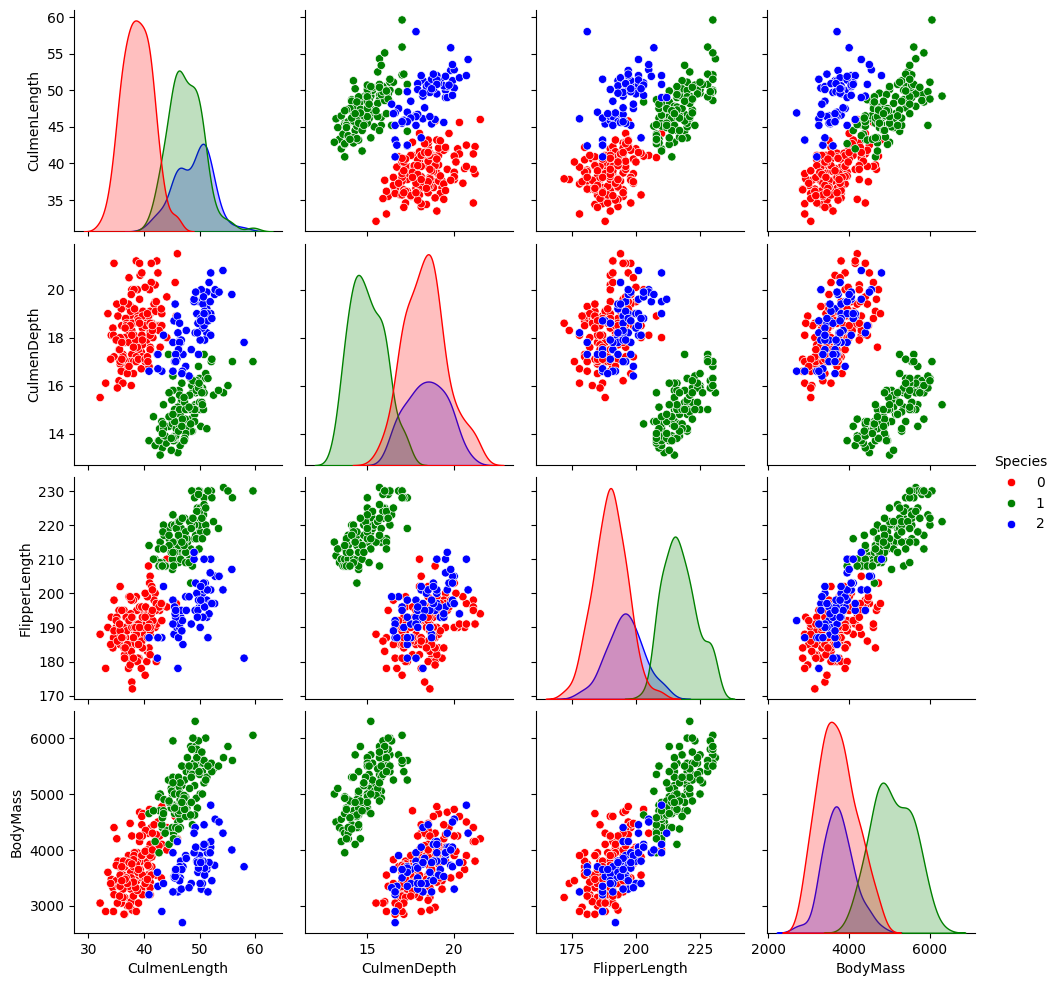

In [ ]:
sns.pairplot(penguins,
             hue='Species',
             palette={0: 'red', 1: 'green', 2: 'blue'})
plt.show()

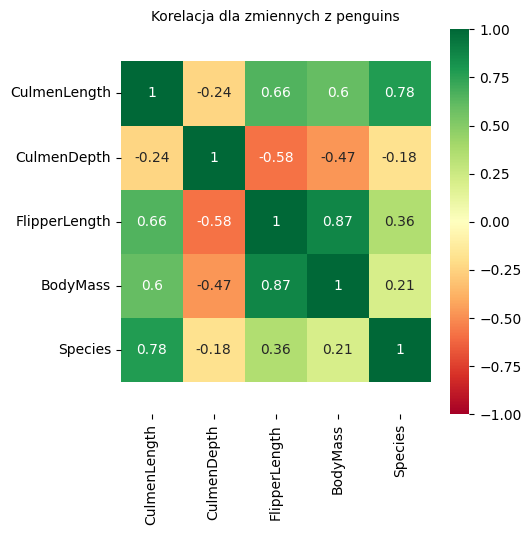

In [ ]:
plt.figure(figsize=(5, 5))
ax = sns.heatmap(pepenguinsns.corr(),
                 xticklabelpenguinsnguins.corr().columns,
                 yticklpenguinss=penguins.corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True,
                 vmin=-1,
                 vmax= 1)

plt.title('Korelacja dla zmiennych z penguins', fontsize=10)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=10)
plt.ytick(fontsize=10)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = penguins.drop('Species', axis=1).copy()
y = penguins['Species'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
pca = PCA(random_state=42)
X_train_pca = pca.fit_transform(X_train_scaler)
train_penguins = pd.DataFrame(np.concatenate([X_train_pca,
                          np.array(y_train).reshape(-1, 1)],
                          axis=1))
train_penguins.rename(columns = {0: 'PC1', 1: 'PC2',
                             2: 'PC3', 3: 'PC4', 4: 'Species'},
                  inplace=True)
train_penguins[['PC1', 'PC2','PC3','PC4']] = train_penguins[['PC1', 'PC2','PC3', 'PC4']].astype(float)
train_penguins.corr()

,PC1,PC2,PC3,PC4,Species
PC1,1.000000e+00,4.684678e-16,-2.198728e-17,2.218258e-16,0.426933
PC2,4.684678e-16,1.000000e+00,-7.840446e-16,-2.198975e-16,0.365677
PC3,-2.198728e-17,-7.840446e-16,1.000000e+00,-1.365239e-15,-0.626119
PC4,2.218258e-16,-2.198975e-16,-1.365239e-15,1.000000e+00,0.028837
Species,4.269326e-01,3.656773e-01,-6.261193e-01,2.883655e-02,1.000000


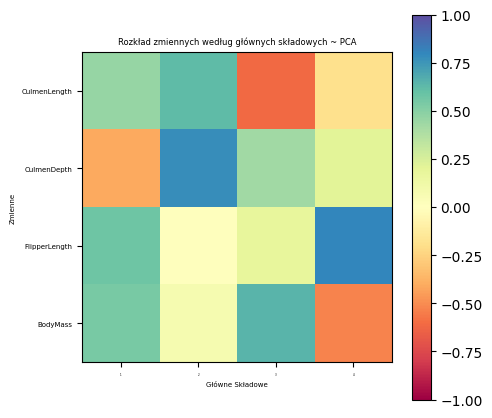

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.imshow(pca.components_.T, cmap = 'Spectral', vmin =-1, vmax = 1)
plt.yticks(range(len(X_train.columns)), X_train.columns, fontsize=5)
plt.xticks(range(4), range(1, 5), fontsize=2)
plt.xlabel('Główne Składowe', fontsize=5)
plt.ylabel('Zmienne', fontsize=5)
plt.title('Rozkład zmiennych według głównych składowych ~ PCA', fontsize=6)
plt.colorbar()
plt.show()

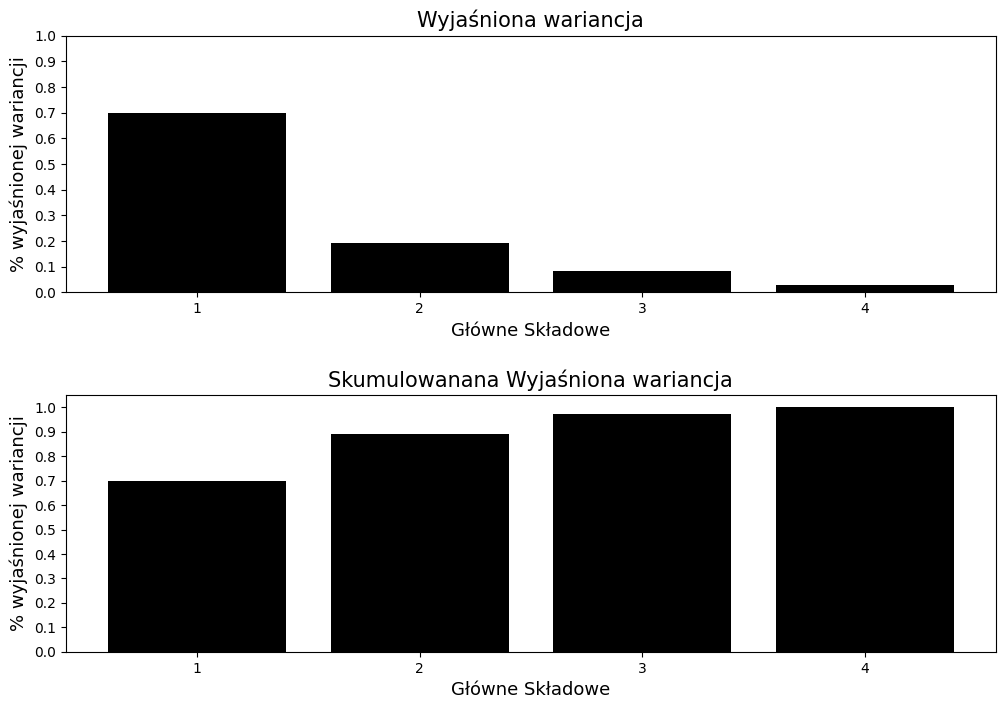

Główna składowa: 1, Wyjaśniona wariancja: 0.69963, Skumulowana Wyjaśniona wariancja: 0.69963
Główna składowa: 2, Wyjaśniona wariancja: 0.19098, Skumulowana Wyjaśniona wariancja: 0.89061
Główna składowa: 3, Wyjaśniona wariancja: 0.08227, Skumulowana Wyjaśniona wariancja: 0.97288
Główna składowa: 4, Wyjaśniona wariancja: 0.02712, Skumulowana Wyjaśniona wariancja: 1.0


In [ ]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(wspace=.4, hspace=.4)
ax = fig.add_subplot(2, 1, 1)
ax.bar(range(1, 1+pca.n_components_), pca.explained_variance_ratio_, color='black')
ax.set(xticks=[1, 2, 3, 4])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Wyjaśniona wariancja', fontsize=15)
plt.xlabel('Główne Składowe', fontsize=13)
plt.ylabel('% wyjaśnionej wariancji', fontsize=13)
ax = fig.add_subplot(2, 1, 2)
ax.bar(range(1, 1+pca.n_components_), np.cumsum(pca.explained_variance_ratio_), color='black')
ax.set(xticks=[1, 2, 3, 4])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Skumulowanana Wyjaśniona wariancja', fontsize=15)
plt.xlabel('Główne Składowe', fontsize=13)
plt.ylabel('% wyjaśnionej wariancji', fontsize=13)
plt.show()

principal_component = 1
cum_explained_var = 0
for explained_var in pca.explained_variance_ratio_:
    cum_explained_var += explained_var
    print(f'Główna składowa: {principal_component}, Wyjaśniona wariancja: {np.round(explained_var, 5)}, Skumulowana Wyjaśniona wariancja: {np.round(cum_explained_var, 5)}')
    principal_component += 1

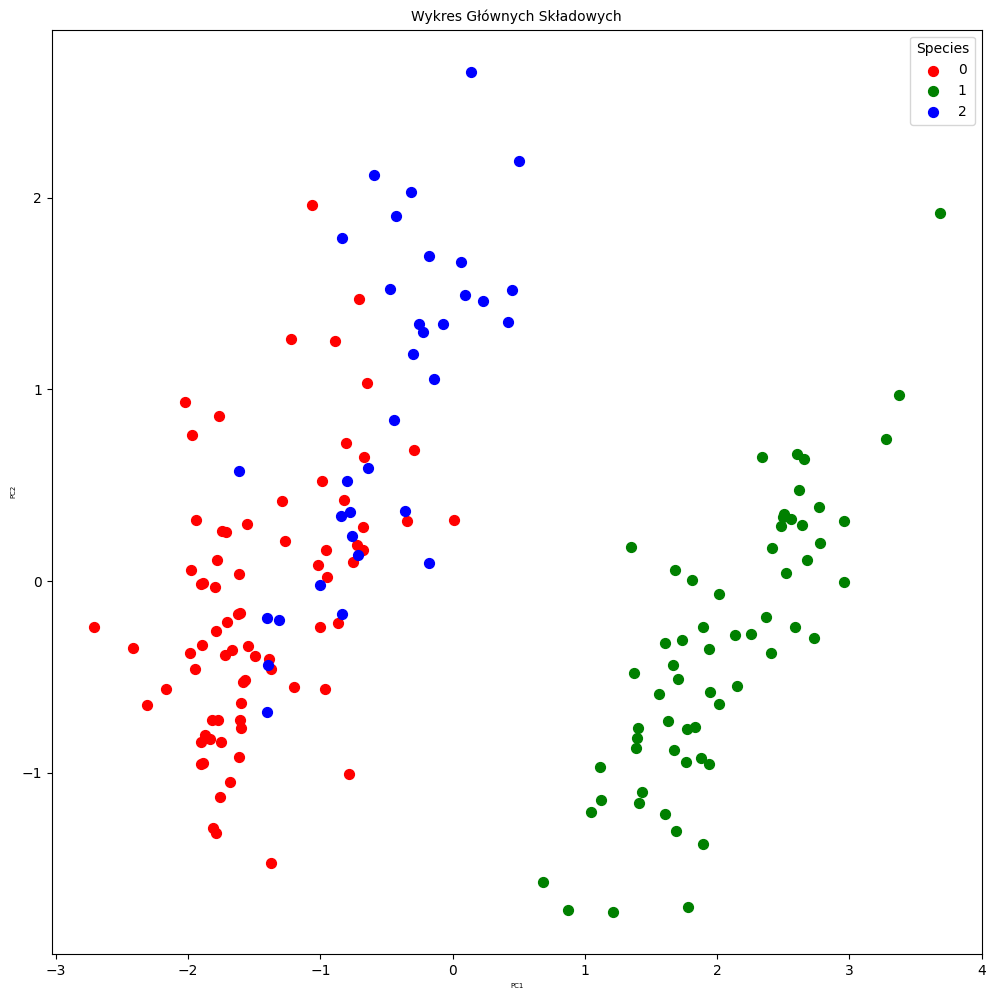

In [ ]:
fig = plt.figure(figsize=(12, 12))
plt.scatter(x=train_penguins.loc[train_penguins['Species']==0, 'PC1'],
            y=train_penguins.loc[train_penguins['Species']==0,'PC2'],
            c='red', label='0', s=50)
plt.scatter(x=train_penguins.loc[train_penguins['Species']==1, 'PC1'],
            y=train_penguins.loc[train_penguins['Species']==1,'PC2'],
            c='green', label='1', s=50)
plt.scatter(x=train_penguins.loc[train_penguins['Species']==2, 'PC1'],
            y=train_penguins.loc[train_penguins['Species']==2,'PC2'],
            c='blue', label='2', s=50)
plt.xlabel(xlabel='PC1', size=5)
plt.ylabel(ylabel='PC2', size=5)
plt.title('Wykres Głównych Składowych', size=10)
plt.legend(title='Species')
plt.show()

Klasy zdecydowanie łatwiejsze do odseparowania

KLASYFIKACJA

In [ ]:
from sklearn.linear_model import LogisticRegression
from prettytable import PrettyTable
import datetime

X_test_scaler = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaler)

def train_and_check(Xtrain, Xtest, ytrain, ytest):
    classifier = LogisticRegression(max_iter=100000)
    start = datetime.datetime.now()
    classifier.fit(Xtrain, ytrain)
    end = datetime.datetime.now()
    time = (end - start).microseconds
    evaluation = np.round(classifier.score(Xtest, ytest), 4)
    return evaluation, time

results = PrettyTable(['Model',
                       'Dokładność',
                       'Czas trenowania (microseconds)'])

# Trenowanie modelu na nieprzetworzonym zbiorze
not_scaled_data = train_and_check(X_train, X_test, y_train, y_test)
results.add_row(['Nieskalowane dane', not_scaled_data[0], not_scaled_data[1]])

# Trenowanie modelu na przetworzonym zbiorze
scaled_data = train_and_check(X_train_scaler, X_test_scaler, y_train, y_test)
results.add_row(['Skalowane dane', scaled_data[0], scaled_data[1]])

# Trenowanie modelu na czterech Głównych Składowych
PC4_data = train_and_check(X_train_pca, X_test_pca, y_train, y_test)
results.add_row(['4 PC', PC4_data[0], PC4_data[1]])

# Trenowanie modelu na trzech Głównych Składowych
PC3_data = train_and_check(X_train_pca[:, :3], X_test_pca[:, :3], y_train, y_test)
results.add_row(['3 PC', PC3_data[0], PC3_data[1]])

# Trenowanie modelu na dwóch Głównych Składowych
PC2_data = train_and_check(X_train_pca[:, :2], X_test_pca[:, :2], y_train, y_test)
results.add_row(['2 PC', PC2_data[0], PC2_data[1]])

# Trenowanie modelu na jednej Głównej Składowej
PC1_data = train_and_check(X_train_pca[:, :1], X_test_pca[:, :1],  y_train, y_test)
results.add_row(['1 PC', PC1_data[0], PC1_data[1]])
print(results)

+-------------------+------------+--------------------------------+
|       Model       | Dokładność | Czas trenowania (microseconds) |
+-------------------+------------+--------------------------------+
| Nieskalowane dane |   0.9942   |             256198             |
|   Skalowane dane  |    1.0     |             11114              |
|        4 PC       |    1.0     |             78548              |
|        3 PC       |   0.9942   |             93827              |
|        2 PC       |   0.9181   |             22904              |
|        1 PC       |   0.9298   |             18453              |
+-------------------+------------+--------------------------------+


REGRESJA

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from prettytable import PrettyTable
import datetime


X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# PCA
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_scaler)
X_test_pca = pca.transform(X_test_scaler)

# Funkcja do trenowania i oceny modelu
def train_and_check(Xtrain, Xtest, ytrain, ytest):
    model = LinearRegression()
    start = datetime.datetime.now()
    model.fit(Xtrain, ytrain)
    end = datetime.datetime.now()
    time = (end - start).microseconds
    pred = model.predict(Xtest)
    r2 = np.round(r2_score(ytest, pred), 4)
    mse = np.round(mean_squared_error(ytest, pred), 4)
    return r2, mse, time

# Tabela wyników
results = PrettyTable(['Model', 'R2 Score', 'MSE', 'Czas trenowania (μs)'])

# 1. Nieskalowane dane
raw = train_and_check(X_train, X_test, y_train, y_test)
results.add_row(['Nieskalowane', raw[0], raw[1], raw[2]])

# 2. Skalowane dane
scaled = train_and_check(X_train_scaler, X_test_scaler, y_train, y_test)
results.add_row(['Skalowane', scaled[0], scaled[1], scaled[2]])

# 3. PCA (4 składowe)
pca_4 = train_and_check(X_train_pca, X_test_pca, y_train, y_test)
results.add_row(['PCA 4', pca_4[0], pca_4[1], pca_4[2]])

# 4. PCA (3 składowe)
pca_3 = train_and_check(X_train_pca[:, :3], X_test_pca[:, :3], y_train, y_test)
results.add_row(['PCA 3', pca_3[0], pca_3[1], pca_3[2]])

# 5. PCA (2 składowe)
pca_2 = train_and_check(X_train_pca[:, :2], X_test_pca[:, :2], y_train, y_test)
results.add_row(['PCA 2', pca_2[0], pca_2[1], pca_2[2]])

# 6. PCA (1 składowa)
pca_1 = train_and_check(X_train_pca[:, :1], X_test_pca[:, :1], y_train, y_test)
results.add_row(['PCA 1', pca_1[0], pca_1[1], pca_1[2]])

print(results)

+--------------+----------+--------+----------------------+
|    Model     | R2 Score |  MSE   | Czas trenowania (μs) |
+--------------+----------+--------+----------------------+
| Nieskalowane |  0.744   | 0.1492 |         2653         |
|  Skalowane   |  0.744   | 0.1492 |         1124         |
|    PCA 4     |  0.744   | 0.1492 |         1304         |
|    PCA 3     |  0.7425  | 0.1501 |         1319         |
|    PCA 2     |  0.4271  | 0.3339 |         1196         |
|    PCA 1     |  0.2371  | 0.4447 |         1108         |
+--------------+----------+--------+----------------------+


Klasyfikacja wyszła zdecydowanie lepiej – model uzyskał prawie perfekcyjne wyniki po skalowaniu i nie stracił jakości nawet po PCA. Regresja była stabilna tylko bez silnej redukcji wymiarów.